In [50]:
import numpy as np

In [51]:
import pandas as pd
df = pd.read_csv(r'Bank_Personal_Loan_Modelling.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [53]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [54]:
df=df.drop(['ID'],axis=1)

{'whiskers': [<matplotlib.lines.Line2D at 0x278aacd1790>,
 'caps': [<matplotlib.lines.Line2D at 0x278abfdf3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x278a3ebe950>],
 'medians': [<matplotlib.lines.Line2D at 0x278a3ec8850>],
 'fliers': [<matplotlib.lines.Line2D at 0x278a3ec9c50>],
 'means': []}

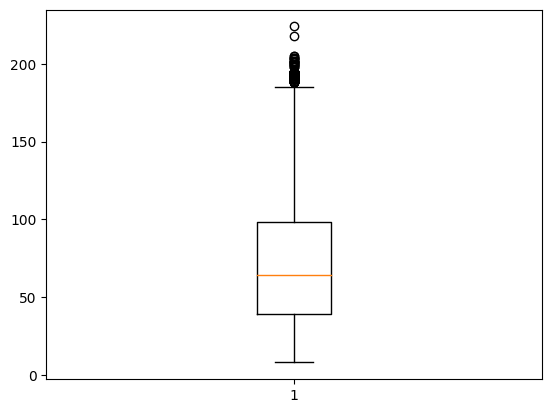

In [55]:
import matplotlib.pyplot as plt
plt.boxplot(df['Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x278aea60090>,
 'caps': [<matplotlib.lines.Line2D at 0x278aea61290>,
 'boxes': [<matplotlib.lines.Line2D at 0x278aea4f710>],
 'medians': [<matplotlib.lines.Line2D at 0x278aea623d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x278aea2e4d0>],
 'means': []}

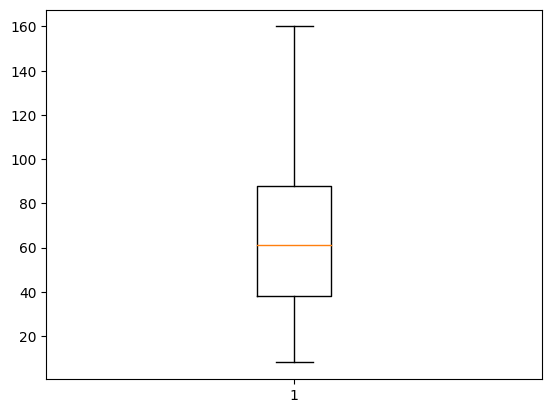

In [56]:
inc_index = df[df['Income']>160].index
df = df.drop(inc_index)
plt.boxplot(df['Income'])

In [57]:
df_input = df.drop(['Personal Loan'],axis=1)
df_input.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_input.values,df['Personal Loan'].values,test_size=0.25,random_state=46,stratify=df['Personal Loan'])

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train.shape

(3498, 12)

In [59]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Dense(12, activation='relu',name='firstlayer'),
  tf.keras.layers.Dense(1,activation='sigmoid',name='secondlayer')])

In [60]:
output = model(X_train)

In [61]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
ini_pred  =lc.fit_transform(output.numpy().flatten()>0.5) 

from sklearn.metrics import accuracy_score
accuracy_score(Y_train,ini_pred)

0.5057175528873642

In [62]:
type(model.layers[0].get_weights())

list

In [63]:
model.layers[0].get_weights()[0]

array([[-0.3269614 , -0.20709968,  0.37628734, -0.3448913 , -0.16694307,
        -0.0599997 , -0.09584832,  0.27113104, -0.02902627, -0.16968572,
        -0.20185542, -0.48541665],
       [ 0.09215271, -0.05537713, -0.4100784 , -0.47215867,  0.48129869,
        -0.41160822, -0.38137102, -0.13347995,  0.45231366,  0.3897078 ,
         0.39112103, -0.17892087],
       [-0.22733414, -0.21713257,  0.2085092 , -0.4212011 ,  0.2005744 ,
        -0.14055336,  0.14577234,  0.3179009 , -0.09184933,  0.35657895,
         0.1954869 ,  0.3224634 ],
       [-0.37975287,  0.04749346,  0.0438844 , -0.2059393 , -0.4094528 ,
         0.06294298, -0.1603409 , -0.24409378, -0.38569486, -0.46779168,
         0.11725342, -0.40268457],
       [ 0.42787826,  0.02543592, -0.40395355,  0.05032039,  0.02315283,
         0.16491187,  0.17492712,  0.35949147,  0.00426483,  0.04455614,
        -0.2268728 , -0.186257  ],
       [-0.4491098 , -0.08245385, -0.2703668 ,  0.04163313,  0.28712368,
        -0.3266605 , -

In [64]:
model.layers[0].get_weights()[0].shape

(12, 12)

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 firstlayer (Dense)          (3498, 12)                156       
                                                                 
 secondlayer (Dense)         (3498, 1)                 13        
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.get_weights()[3].shape

(1,)

In [77]:
def conv_lin_weights_nn_weights(weights):
    we_list=[]
    w1=np.array(weights[:144])
    w1=w1.reshape(12,12)
    b1=np.array(weights[144:156])
    w2=np.array(weights[156:168])
    w2=w2.reshape(12,1)
    b2=np.array(weights[168:])
    b2=b2.reshape(1)
    we_list.append(w1)
    we_list.append(b1)
    we_list.append(w2)
    we_list.append(b2)

    return we_list

In [78]:
def objective_function(weights,nn):
    we=conv_lin_weights_nn_weights(weights)
    nn.set_weights(we)
    y_pred = nn.predict(X_train)
    y_pred = lc.fit_transform(y_pred.flatten() > 0.5)
    print('accuracy:',round(accuracy_score(y_pred,Y_train),5)*100)
    return accuracy_score(Y_train,y_pred)

In [79]:
import numpy as np

class ACO:
    def __init__(self, num_ants, num_iterations, num_weights, Q, rho, alpha, beta,model):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.num_weights = num_weights
        self.Q = Q
        self.rho = rho
        self.alpha = alpha
        self.beta = beta
        self.pheromones = np.ones((self.num_weights,)) / self.num_weights
        self.best_weights = None
        self.best_fitness = np.inf
        self.model=model
        self.max_weights=None
        self.max_fitness=0.0

    def _softmax(self, x):
        return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

    def _compute_probabilities(self, weights):
        logits = np.dot(weights, self.pheromones)
        probabilities = self._softmax(logits)
        return probabilities

    def _sample_ant(self, weights):
        probabilities = self._compute_probabilities(weights)
        ant = np.random.choice(self.num_weights, size=1, p=probabilities)[0]
        return ant

    def _update_pheromones(self, weights, fitnesses):
        for i in range(self.num_weights):
            delta = 0.0
            for ant in range(self.num_ants):
                if fitnesses[ant] <  self.best_fitness:
                    self.best_weights = weights[ant]
                    self.best_fitness = fitnesses[ant]
                if i in weights[ant]:
                    delta += self.Q / fitnesses[ant]
            self.pheromones[i] = (1 - self.rho) * self.pheromones[i] + delta

    def optimize_weights(self, fitness_function):
        weights = np.random.uniform(-1, 1, size=(self.num_ants, self.num_weights))
        for iteration in range(self.num_iterations):
            print('iter ',iteration)

            fitnesses=[]
            for w in weights:
                fit=fitness_function(w,self.model)
                if fit >= self.max_fitness:
                    self.max_fitness=fit
                    self.max_weights=w
                fitnesses.append(fit)

            self._update_pheromones(weights, fitnesses)
            for ant in range(self.num_ants):
                print('ant',ant)
                ant_weights = weights[ant].copy()
                for weight_idx in range(self.num_weights):
                    if np.random.rand() < self.alpha:
                        ant_weights[weight_idx] += self.beta * np.random.normal()
                    else:
                        ant_weights[weight_idx] = self.best_weights[weight_idx]
                weights[ant] = ant_weights

        return self.max_weights


In [83]:
num_ants = 8
num_iterations = 15
num_weights = 169
Q = 0.8
rho = 0.5
alpha = 0.9
beta = 0.1
aco = ACO(num_ants, num_iterations, num_weights, Q, rho, alpha, beta,model)

bw = aco.optimize_weights(objective_function)

iter  0
110/110 [==============================] - 0s 2ms/step
accuracy: 78.473
110/110 [==============================] - 0s 2ms/step
accuracy: 42.367
110/110 [==============================] - 0s 2ms/step
accuracy: 90.70899999999999
110/110 [==============================] - 0s 2ms/step
accuracy: 39.28
110/110 [==============================] - 0s 1ms/step
accuracy: 55.889
110/110 [==============================] - 0s 3ms/step
accuracy: 84.36200000000001
110/110 [==============================] - 0s 1ms/step
accuracy: 37.907000000000004
110/110 [==============================] - 0s 2ms/step
accuracy: 82.018
ant 0
ant 1
ant 2
ant 3
ant 4
ant 5
ant 6
ant 7
iter  1
110/110 [==============================] - 0s 1ms/step
accuracy: 82.161
110/110 [==============================] - 0s 2ms/step
accuracy: 47.799
110/110 [==============================] - 0s 1ms/step
accuracy: 87.764
110/110 [==============================] - 0s 2ms/step
accuracy: 50.858000000000004
110/110 [==================

In [92]:
se = conv_lin_weights_nn_weights(bw)
model.set_weights(se)
y_t=model.predict(X_test)
Y_t= lc.fit_transform(y_t.flatten() > 0.5)
print('testcase accuracy:',accuracy_score(Y_test,Y_t)*100)

37/37 [==============================] - 0s 2ms/step
testcase accuracy: 31.276778063410454
